## Importing Libraries

In [1]:
import os
from google.colab import drive # either use file off the drive
from google.colab import files # or upload the file to use temporarily

## Mounting Colab Notebooks Folder on Google Drive

In [2]:
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks')
# os.path.exists('/content/drive/My Drive/Colab Notebooks')

## Uploading Files

In [3]:
upload = files.upload()

Saving Volve_Production_Data.xlsx to Volve_Production_Data.xlsx


## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

## Importing and Cleaning Data + Visualization

In [5]:
all_data = pd.read_excel('Volve_Production_Data.xlsx')
all_data

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07776,0.22879,0.01862,0.0,0.0,0.0,NaN,production,OP
15630,2016-09-15,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08545,0.22914,0.00631,0.0,0.0,0.0,NaN,production,OP
15631,2016-09-16,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08544,0.22896,0.01181,0.0,0.0,0.0,NaN,production,OP
15632,2016-09-17,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07497,0.22846,0.02576,0.0,0.0,0.0,NaN,production,OP


In [6]:
column_names = all_data.columns
column_names

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [7]:
all_data = all_data[(all_data['FLOW_KIND'] == 'production')][['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]
all_data = all_data.sort_values(by = ['NPD_WELL_BORE_NAME', 'DATEPRD'])
all_data

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2014-04-07,15/9-F-1 C,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.00000,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.00000,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.00000,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0
4,2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,277.27826,0.00000,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,2016-09-13,15/9-F-5,0.0,NaN,NaN,NaN,0.28463,0.673718,0.08545,0.22889,0.03741,0.0,0.0,0.0
15629,2016-09-14,15/9-F-5,0.0,NaN,NaN,NaN,0.27272,0.636088,0.07776,0.22879,0.01862,0.0,0.0,0.0
15630,2016-09-15,15/9-F-5,0.0,NaN,NaN,NaN,0.28686,0.670794,0.08545,0.22914,0.00631,0.0,0.0,0.0
15631,2016-09-16,15/9-F-5,0.0,NaN,NaN,NaN,0.28604,0.664393,0.08544,0.22896,0.01181,0.0,0.0,0.0


In [8]:
well_names = all_data['NPD_WELL_BORE_NAME'].value_counts()
well_names

,count
NPD_WELL_BORE_NAME,
15/9-F-14,3056
15/9-F-12,3056
15/9-F-11,1165
15/9-F-15 D,978
15/9-F-1 C,746
15/9-F-5,160


In [9]:
start_dates = all_data.groupby('NPD_WELL_BORE_NAME')['DATEPRD'].min().sort_values()
start_dates

,DATEPRD
NPD_WELL_BORE_NAME,
15/9-F-12,2008-02-12
15/9-F-14,2008-02-12
15/9-F-11,2013-07-08
15/9-F-15 D,2014-01-12
15/9-F-1 C,2014-04-07
15/9-F-5,2016-04-11


In [10]:
null_values_by_well = all_data[all_data.isnull().any(axis=1)]
# null_values_by_well = null_values_by_well.groupby('NPD_WELL_BORE_NAME').apply(lambda x: x.isnull().sum().sum()).sort_values() # using this showed that 15/9-F-5 had no missing values
null_values_by_well = null_values_by_well.groupby('NPD_WELL_BORE_NAME').apply(lambda x: x.isnull().sum()) # using this shows that 15/9-F-5 is missing all values for 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING'
null_values_by_well

<ipython-input-10-dd573b87e45b>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_values_by_well = null_values_by_well.groupby('NPD_WELL_BORE_NAME').apply(lambda x: x.isnull().sum()) # using this shows that 15/9-F-5 is missing all values for 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING'


,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
NPD_WELL_BORE_NAME,,,,,,,,,,,,,,
15/9-F-1 C,0,0,0,3,3,3,729,0,0,0,0,0,0,0
15/9-F-11,0,0,0,6,6,6,6,2,6,6,6,0,0,0
15/9-F-12,0,0,0,6,6,6,13,44,0,0,0,0,0,0
15/9-F-14,0,0,0,6,6,6,523,196,0,0,0,0,0,0
15/9-F-5,0,0,0,160,160,160,0,0,0,9,0,0,0,0


In [11]:
null_values = all_data.isnull().sum()
null_values

,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,181
AVG_DOWNHOLE_TEMPERATURE,181
AVG_DP_TUBING,181
AVG_ANNULUS_PRESS,1271
AVG_CHOKE_SIZE_P,242
AVG_WHP_P,6
AVG_WHT_P,15


In [12]:
# data = data.dropna() # quick and dirty - suitable if selecting well bores with few null values, but other approaches would be more suitable if columns are missing too many values

columns_to_interpolate = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']

def interpolation(group):
    for col in columns_to_interpolate:
        group[col] = group[col].interpolate(method='linear', order=2, limit_direction='both') # applying interpolation to fill in any missing values
    return group

all_data = all_data.groupby('NPD_WELL_BORE_NAME').apply(interpolation)

# verifying no empty cells in dataframe - except for 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING' for 15/9-F-5
null_values_after_interpolation = all_data.isnull().sum()
null_values_after_interpolation

<ipython-input-12-eecc1c50e14e>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_data = all_data.groupby('NPD_WELL_BORE_NAME').apply(interpolation)


,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,160
AVG_DOWNHOLE_TEMPERATURE,160
AVG_DP_TUBING,160
AVG_ANNULUS_PRESS,0
AVG_CHOKE_SIZE_P,0
AVG_WHP_P,0
AVG_WHT_P,0


In [13]:
# all production data is being included, except for 15/9-F-5 (despite missing 3 columns) becuase it started production last and will be used in a forecasting exercise later
data = all_data[(all_data['NPD_WELL_BORE_NAME'] != '15/9-F-5')][['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL','BORE_GAS_VOL', 'BORE_WAT_VOL']]

In [14]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
DATEPRD,9001,2013-05-01 08:30:39.795578368,2008-02-12 00:00:00,2011-03-28 00:00:00,2014-02-22 00:00:00,2015-05-27 00:00:00,2016-09-17 00:00:00,NaN
ON_STREAM_HRS,9001.0,20.196903,0.0,24.0,24.0,24.0,25.0,8.266102
AVG_DOWNHOLE_PRESSURE,9001.0,181.800635,0.0,0.0,232.949281,255.380762,397.58855,109.683291
AVG_DOWNHOLE_TEMPERATURE,9001.0,77.151837,0.0,0.0,103.189949,106.273233,108.502178,45.648598
AVG_DP_TUBING,9001.0,153.955188,0.0,83.320038,175.512264,204.266673,345.90677,76.745933
AVG_ANNULUS_PRESS,9001.0,12.729303,0.0,0.0,14.808484,20.608424,30.019828,9.328279
AVG_CHOKE_SIZE_P,9001.0,53.901255,0.0,15.489164,51.120816,99.783163,100.0,36.887827
AVG_WHP_P,9001.0,45.793309,0.0,31.419948,38.33721,57.77963,137.31103,24.729518
AVG_WHT_P,9001.0,68.103189,0.0,58.882811,80.275451,88.111511,93.509584,27.708511
DP_CHOKE_SIZE,9001.0,19.488055,0.0,3.479946,9.888581,27.401064,125.71857,22.626218


In [15]:
datetime_col = data.select_dtypes(include=['datetime']).columns[0]
str_col = data.select_dtypes(include=['object']).columns[0]
exclude_col = [datetime_col, str_col]
# exclude_col = [datetime_col]
data.loc[:, data.columns.difference(exclude_col)] = data.loc[:, data.columns.difference(exclude_col)].clip(lower=0) # setting any negative values to 0

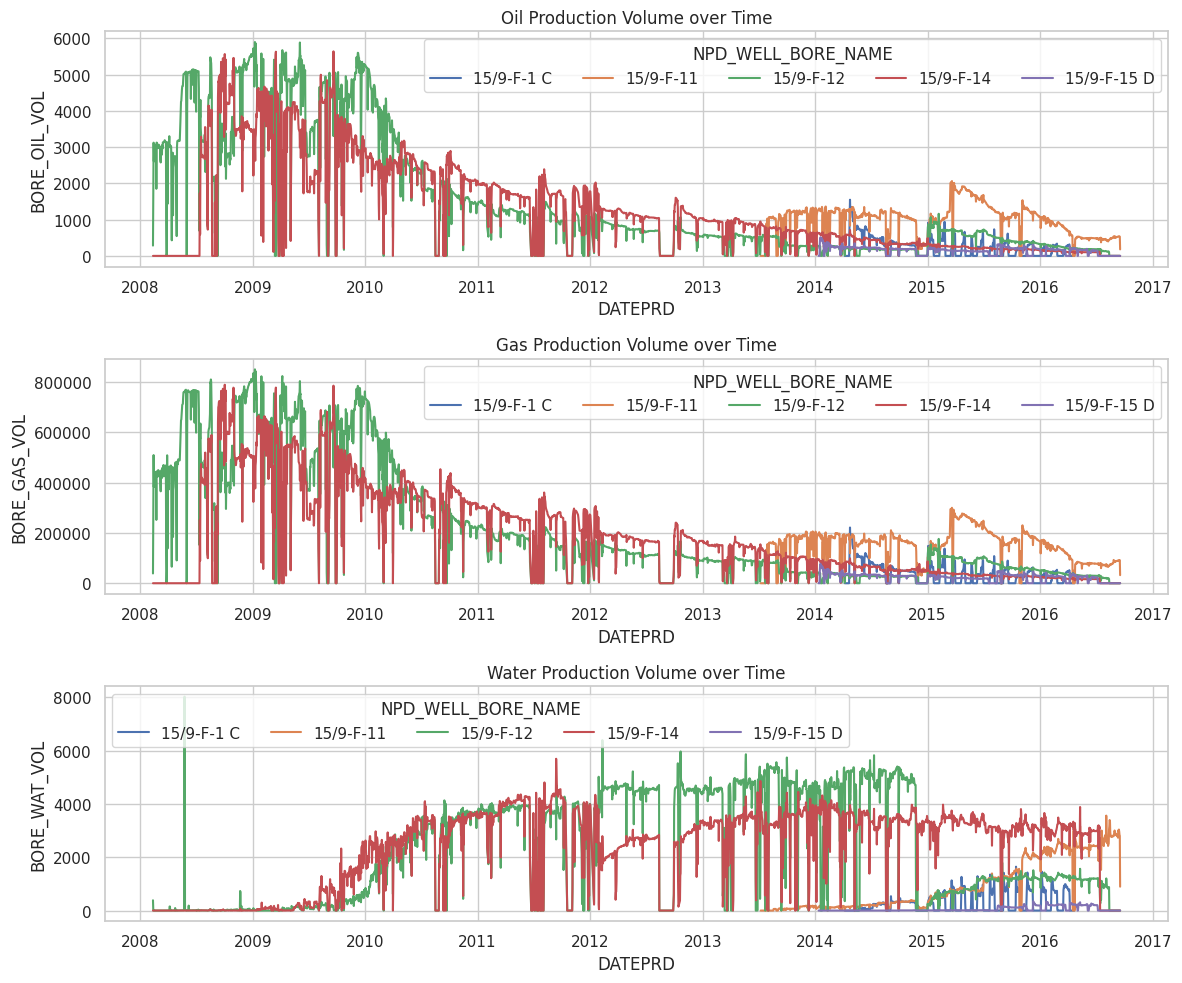

In [16]:
sns.set(style = "whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0])
sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[0].set_title('Oil Production Volume over Time')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('BORE_OIL_VOL')
axes[0].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

# sns.lineplot(data=data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1])
sns.lineplot(data=data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[1].set_title('Gas Production Volume over Time')
axes[1].set_xlabel('DATEPRD')
axes[1].set_ylabel('BORE_GAS_VOL')
axes[1].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

# sns.lineplot(data=data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2])
sns.lineplot(data=data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[2].set_title('Water Production Volume over Time')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('BORE_WAT_VOL')
axes[2].legend(title='NPD_WELL_BORE_NAME', loc='upper left', ncol=5)

plt.tight_layout()
plt.show()

In [17]:
data = data[data['BORE_WAT_VOL'] <= 7000]

In [18]:
columns_to_average = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']
columns_to_sum = ['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']

daily_avg = data.groupby('DATEPRD')[columns_to_average].mean().reset_index() # grouping by DATEPRD and calculating the average of these columns
daily_sum = data.groupby('DATEPRD')[columns_to_sum].sum().reset_index() # grouping by DATEPRD and aggregating the production of oil, gas, and water

field_data = pd.concat([daily_avg, daily_sum], axis=1)
field_data= field_data.loc[:, ~field_data.columns.duplicated()] # to remove duplicate DATEPRD column coming from either daily_avg or daily_sum

field_data

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2008-02-12,5.750000,154.027970,52.209045,100.625000,9.319778,7.242216,53.402970,8.147359,46.266978,284.65,38888.67,385.01
1,2008-02-13,12.000000,151.516759,52.701348,91.072471,8.233321,11.416493,60.444288,26.687165,44.843914,1869.70,285246.16,7.13
2,2008-02-14,11.250000,147.793031,52.887743,90.933943,6.329795,15.624983,56.859087,36.368815,40.084983,3124.09,509954.88,1.16
3,2008-02-15,11.575000,148.831351,52.875938,90.416030,2.632056,14.259465,58.415321,34.997972,42.158695,2608.28,383426.67,0.97
4,2008-02-16,12.000000,147.967759,52.905557,90.250522,6.192347,15.113951,57.717237,35.759174,41.231908,3051.80,418474.00,4.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,2016-09-13,6.000000,149.826548,48.825328,145.795233,13.276425,25.735381,9.467989,20.955164,6.596312,543.81,88042.16,3036.83
3052,2016-09-14,6.000000,149.779171,48.826467,145.759786,13.315494,25.784264,9.457880,21.194998,6.589441,541.88,90188.97,2963.49
3053,2016-09-15,6.000000,149.711370,48.827110,145.706549,13.280454,25.738276,9.446206,20.647362,6.616486,534.87,91890.07,2838.87
3054,2016-09-16,6.000000,149.699779,48.827556,145.701988,13.278240,25.772602,9.437236,20.901993,6.624574,530.27,91579.73,2802.75


## Preparing for Training + Visualization

In [19]:
scaler = MinMaxScaler()

columns = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
columns_to_scale = field_data[columns].copy()
data_scaled = scaler.fit_transform(columns_to_scale)
scaled_data = pd.DataFrame(data_scaled, columns=columns)

scaled_data.insert(0, 'DATEPRD', field_data['DATEPRD'])
# scaled_data.insert(1, 'NPD_WELL_BORE_NAME', data['NPD_WELL_BORE_NAME'])

scaled_data

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2008-02-12,0.230000,0.497229,0.487731,0.327914,0.379730,0.072422,0.433558,0.088548,0.373999,0.030164,0.028509,0.037598
1,2008-02-13,0.480000,0.489123,0.492330,0.296785,0.335463,0.114165,0.490723,0.290046,0.362416,0.198133,0.209112,0.000696
2,2008-02-14,0.450000,0.477102,0.494071,0.296333,0.257904,0.156250,0.461616,0.395269,0.323680,0.331061,0.373844,0.000113
3,2008-02-15,0.463000,0.480454,0.493961,0.294646,0.107242,0.142595,0.474251,0.380371,0.340559,0.276400,0.281087,0.000095
4,2008-02-16,0.480000,0.477666,0.494238,0.294106,0.252304,0.151140,0.468583,0.388644,0.333015,0.323400,0.306780,0.000478
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,2016-09-13,0.240000,0.483666,0.456121,0.475114,0.540941,0.257354,0.076867,0.227748,0.051091,0.057628,0.064543,0.296561
3052,2016-09-14,0.240000,0.483513,0.456131,0.474999,0.542533,0.257843,0.076785,0.230355,0.051035,0.057423,0.066117,0.289399
3053,2016-09-15,0.240000,0.483295,0.456137,0.474825,0.541105,0.257383,0.076690,0.224403,0.051255,0.056680,0.067364,0.277230
3054,2016-09-16,0.240000,0.483257,0.456142,0.474810,0.541015,0.257726,0.076617,0.227170,0.051321,0.056193,0.067136,0.273702


In [20]:
X = scaled_data[['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]
Y = scaled_data[['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]

X = X.values
Y = Y.values

In [21]:
def datasplit(X, Y, train_size=0.7, validation_size=0.15, test_size=0.15):

    assert train_size + validation_size + test_size == 1.0

    total_samples = X.shape[0]
    training = int(train_size * total_samples)
    validation = int(validation_size * total_samples)
    test = total_samples - (training + validation)

    X_train = X[:training]
    Y_train = Y[:training]

    X_val = X[training:training+validation]
    Y_val = Y[training:training+validation]

    X_test = X[training+validation:]
    Y_test = Y[training+validation:]

    print(f"X_train shape: {X_train.shape}")
    print(f"Y_train shape: {Y_train.shape}")
    print(f"X_val shape: {X_val.shape}")
    print(f"Y_val shape: {Y_val.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"Y_test shape: {Y_test.shape}")

    return X_train, Y_train, X_val, Y_val, X_test, Y_test

X_train, Y_train, X_val, Y_val, X_test, Y_test = datasplit(X, Y)

X_train shape: (2139, 12)
Y_train shape: (2139, 3)
X_val shape: (458, 12)
Y_val shape: (458, 3)
X_test shape: (459, 12)
Y_test shape: (459, 3)


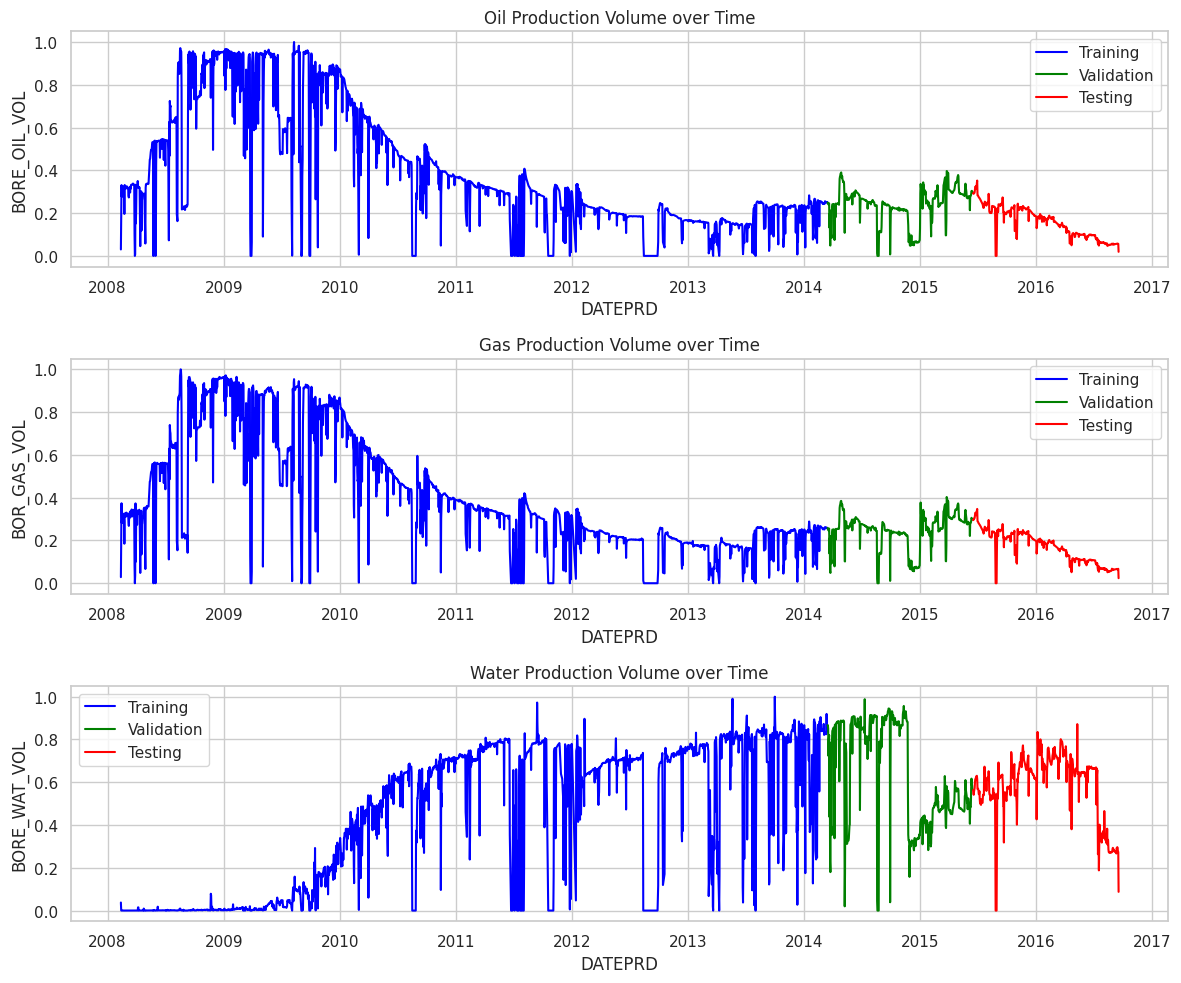

In [22]:
sns.set(style = "whitegrid")
fig, axes = plt.subplots(3, 1, figsize = (12, 10))

sns.lineplot(data=scaled_data[:Y_train.shape[0]], x='DATEPRD', y=Y_train[:, 0], label='Training', ax=axes[0], color='blue')
sns.lineplot(data=scaled_data[Y_train.shape[0]:Y_train.shape[0] + Y_val.shape[0]], x='DATEPRD', y=Y_val[:, 0], label='Validation', ax=axes[0], color='green')
sns.lineplot(data=scaled_data[Y_train.shape[0] + Y_val.shape[0]:], x='DATEPRD', y=Y_test[:, 0], label='Testing', ax=axes[0], color='red')
axes[0].set_title('Oil Production Volume over Time')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('BORE_OIL_VOL')

sns.lineplot(data=scaled_data[:Y_train.shape[0]], x='DATEPRD', y=Y_train[:, 1], label='Training', ax=axes[1], color='blue')
sns.lineplot(data=scaled_data[Y_train.shape[0]:Y_train.shape[0] + Y_val.shape[0]], x='DATEPRD', y=Y_val[:, 1], label='Validation', ax=axes[1], color='green')
sns.lineplot(data=scaled_data[Y_train.shape[0] + Y_val.shape[0]:], x='DATEPRD', y=Y_test[:, 1], label='Testing', ax=axes[1], color='red')
axes[1].set_title('Gas Production Volume over Time')
axes[1].set_xlabel('DATEPRD')
axes[1].set_ylabel('BOR_GAS_VOL')

sns.lineplot(data=scaled_data[:Y_train.shape[0]], x='DATEPRD', y=Y_train[:, 2], label='Training', ax=axes[2], color='blue')
sns.lineplot(data=scaled_data[Y_train.shape[0]:Y_train.shape[0] + Y_val.shape[0]], x='DATEPRD', y=Y_val[:, 2], label='Validation', ax=axes[2], color='green')
sns.lineplot(data=scaled_data[Y_train.shape[0] + Y_val.shape[0]:], x='DATEPRD', y=Y_test[:, 2], label='Testing', ax=axes[2], color='red')
axes[2].set_title('Water Production Volume over Time')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('BORE_WAT_VOL')

plt.tight_layout()
plt.legend()
plt.show()

## Defining Windowed Version of Data

In [23]:
def windows(features, target, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((features, target))
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.zip((x.batch(window_size + 1), y.batch(window_size + 1))))

    dataset = dataset.map(
        lambda x, y: (
            tf.concat(
                [
                    x[1:, :9], # selecting operational features from t-7 to t
                    x[:-1, 9:] # selecting production features from t-8 to t-1
                    ],
                axis=1),
            y[-1] # selecting target(s) at t
            )
        )

    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

## Defining Windows and Iterator

In [24]:
window_size = 8
batch_size = 64

train_set = windows(X_train, Y_train, window_size, batch_size)
val_set = windows(X_val, Y_val, window_size, batch_size)
test_set = windows(X_test, Y_test, window_size, batch_size)

In [25]:
train_iterator = iter(train_set) # creating an iterator to loop through the dataset
first_element = next(train_iterator) # calling the next  batch from the iterator

In [26]:
features_shape = first_element[0].shape
target_shape = first_element[1].shape

print("Features Shape:", features_shape)
print("Target Shape:", target_shape)

Features Shape: (64, 8, 12)
Target Shape: (64, 3)


## Defining Model

The model's architecture was loosely based on a literature review of various research papers (including Ng et al., 2022 and Ansari, 2023).

In [27]:
def LSTM_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(32, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units = 3, activation = 'sigmoid')
    ])

    return model

## Specifying Training Parameters and Training Model

In [35]:
tf.keras.utils.set_random_seed(50)

model = LSTM_model()

epochs = 1000
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 50, restore_best_weights = True)
learning_rate = 0.0005

optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
loss = tf.keras.losses.MeanSquaredLogarithmicError()
model.compile(loss = loss, optimizer = optimizer)

history = model.fit(
    train_set,
    epochs = epochs,
    validation_data = val_set,
    shuffle = False,
    callbacks = [early_stopping],
    verbose = 1
)

Epoch 1/1000
     34/Unknown 6s 56ms/step - loss: 0.0615

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0612 - val_loss: 0.0335
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0568 - val_loss: 0.0287
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0556 - val_loss: 0.0247
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0541 - val_loss: 0.0212
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0507 - val_loss: 0.0154
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0467 - val_loss: 0.0121
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - val_loss: 0.0116
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0324 - val_loss: 0.0113
Epoch 9/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0297 - val_loss: 0.0105
Epoch 10/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0270 - val_loss: 0.0101
Epoch 11/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0270 - val_loss: 0.0093
Epoch 12/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step 

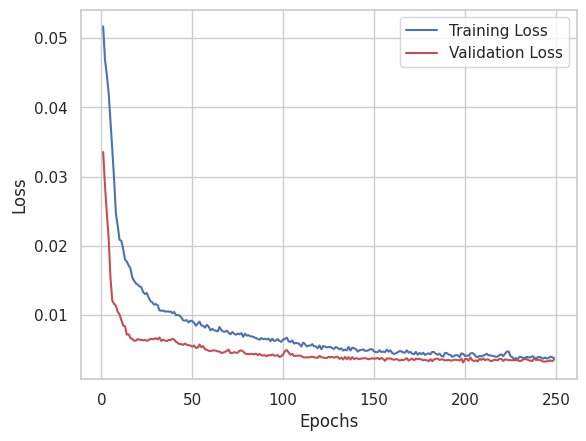

Training MSLE is 0.0037664249539375305
Validation MSLE is 0.0035577788949012756


In [36]:
training_loss = model.history.history['loss']
validation_loss = model.history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

Final_Train_MSLE = training_loss[-1]
print(f"Training MSLE is {Final_Train_MSLE}")
Final_Val_MSLE = validation_loss[-1]
print(f"Validation MSLE is {Final_Val_MSLE}")

The curves converge nicely, suggesting that the model was trained effectively and should generalize well given the MSLE values (and that validation MSLE remains lower than training MSLE). The losses start high and steeply drop after about 25 epochs, during which the model learned key patterns in the data. The losses stabilize after another 25 to 75 epochs.

## Running Model to Forecast

In [37]:
predictions = model.predict(test_set)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


## Creating Dataset with Actual and Predicted Values + Visualization

In [38]:
for_reverse_scaling = np.hstack([X_test[window_size:, 3:], predictions])
unscaled_data = scaler.inverse_transform(for_reverse_scaling) # unscaling predictions for plotting
final_data = field_data.iloc[-predictions.shape[0]:].copy()

# adding unscaled predictions as new columns at specified positions
final_data.insert(11, 'PREDICTED_OIL', unscaled_data[:, -3])
final_data.insert(13, 'PREDICTED_GAS', unscaled_data[:, -2])
final_data.insert(15, 'PREDICTED_WATER', unscaled_data[:, -1])

final_data

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,PREDICTED_OIL,BORE_GAS_VOL,PREDICTED_GAS,BORE_WAT_VOL,PREDICTED_WATER
2605,2015-06-25,24.000000,182.943582,83.968564,160.327074,13.273079,57.777963,34.455939,70.348237,5.980409,3038.21,3054.330964,447399.00,460110.205419,6313.23,6762.596729
2606,2015-06-26,24.000000,182.578180,83.971705,160.326112,13.140208,58.267437,34.200011,68.385122,5.704992,3078.13,3058.290724,450437.29,460737.276889,6365.02,6765.981174
2607,2015-06-27,24.000000,182.173392,83.983339,159.834192,13.245478,58.711367,34.276776,70.039159,5.488488,3090.54,3093.931931,451443.34,465696.568672,6420.81,6790.670843
2608,2015-06-28,24.000000,183.508896,83.960756,160.537979,13.112158,58.239513,34.923225,69.107932,6.311024,2966.31,3100.002343,433696.32,466590.120109,6421.43,6784.346904
2609,2015-06-29,24.000000,182.425131,83.975119,159.780967,13.139767,59.845231,34.658026,70.787286,5.856151,3228.66,3109.857587,464070.90,467962.359816,6452.86,6811.010476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,2016-09-13,6.000000,149.826548,48.825328,145.795233,13.276425,25.735381,9.467989,20.955164,6.596312,543.81,200.440466,88042.16,34620.798819,3036.83,1063.871509
3052,2016-09-14,6.000000,149.779171,48.826467,145.759786,13.315494,25.784264,9.457880,21.194998,6.589441,541.88,202.260746,90188.97,34929.372356,2963.49,1085.149189
3053,2016-09-15,6.000000,149.711370,48.827110,145.706549,13.280454,25.738276,9.446206,20.647362,6.616486,534.87,199.071670,91890.07,34396.968859,2838.87,1073.171181
3054,2016-09-16,6.000000,149.699779,48.827556,145.701988,13.278240,25.772602,9.437236,20.901993,6.624574,530.27,198.624422,91579.73,34336.091094,2802.75,1065.287010


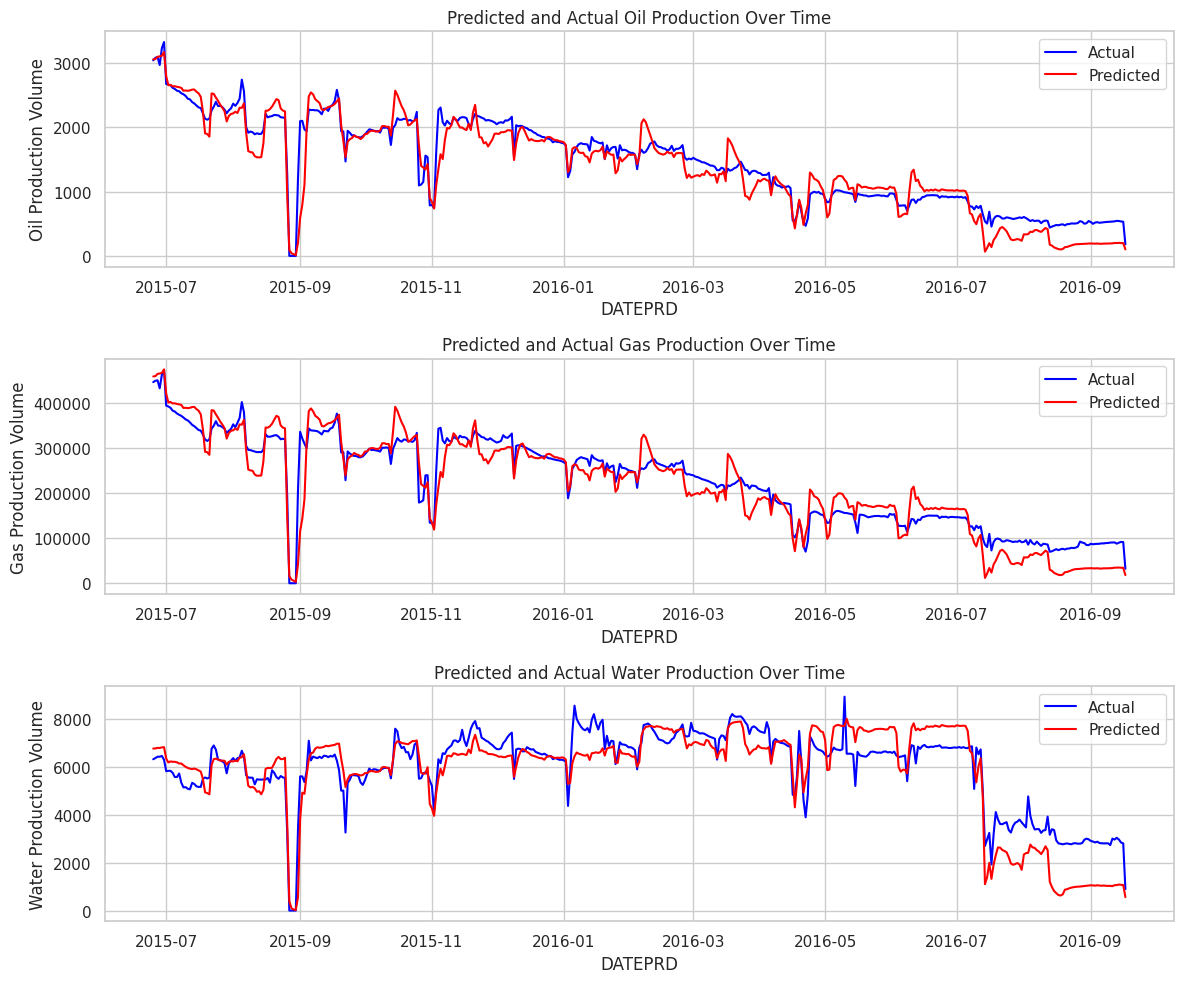

In [39]:
fig, axes = plt.subplots(3, 1, figsize = (12, 10))

sns.lineplot(data=final_data, x='DATEPRD', y='BORE_OIL_VOL', label='Actual', ax=axes[0], color='blue')
sns.lineplot(data=final_data, x='DATEPRD', y='PREDICTED_OIL', label='Predicted', ax=axes[0], color='red')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('Oil Production Volume')
axes[0].set_title('Predicted and Actual Oil Production Over Time')
axes[0].legend()

sns.lineplot(data=final_data, x='DATEPRD', y='BORE_GAS_VOL', label='Actual', ax=axes[1], color='blue')
sns.lineplot(data=final_data, x='DATEPRD', y='PREDICTED_GAS', label='Predicted', ax=axes[1], color='red')
axes[0].set_xlabel('DATEPRD')
axes[1].set_ylabel('Gas Production Volume')
axes[1].set_title('Predicted and Actual Gas Production Over Time')
axes[1].legend()

sns.lineplot(data=final_data, x='DATEPRD', y='BORE_WAT_VOL', label='Actual', ax=axes[2], color='blue')
sns.lineplot(data=final_data, x='DATEPRD', y='PREDICTED_WATER', label='Predicted', ax=axes[2], color='red')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('Water Production Volume')
axes[2].set_title('Predicted and Actual Water Production Over Time')
axes[2].legend()

plt.tight_layout()
plt.show()

The model performs generally well as its current day forecast captures the overall trends of actual oil, gas, and water production across the different phases of operation. This includes the overall declining trend that oil and gas production share, and the relatively increasing water production, followed by the drop in production values around July 2016 onwards before shutdown.

However, there are discrepancies given the high volatility in production values, and the highest errors occur during sharp changes suggesting that there may be underrepresentation in the training data or insufficient temporal dependencies captured. While the model demonstrates the capability to forecast across multiple targets and maintain consistent  predictions, it should not be suggested at this point that operational features offer an adequate representation of reservoir physics. Improvements to the model (e.g. data augmentation, different feature engineering, neural architecture search, etc.) could help reduce over/underestimation and improve forecasting over periods of sharp changes.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0034


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


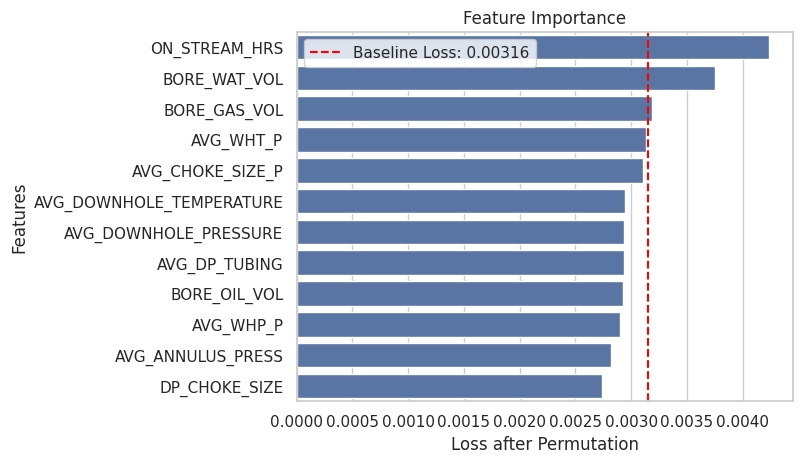

In [41]:
feature_names = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']

def feature_importance_scores(model, dataset, baseline_loss):

    importance_scores = {}

    for feature_idx, feature_name in enumerate(feature_names):

        loss_difference = []

        for batch in dataset:

            X_batch, y_batch = batch
            X_permuted = X_batch.numpy().copy()

            np.random.shuffle(X_permuted[:, :, feature_idx]) # shuffling the specific feature across the time window
            permuted_loss = model.evaluate(X_permuted, y_batch, verbose = 0) # computing loss (MSLE in this case) after permutation

            loss_difference.append(permuted_loss) # tracking the differences

        permuted_loss_avg = np.mean(loss_difference) # averaging the difference over the batches
        importance_scores[feature_name] = permuted_loss_avg

    return importance_scores

# baseline_loss = model.evaluate(val_set) # computing baesline loss (MSLE) on training dataset
baseline_loss = model.evaluate(val_set, steps=len(val_set))


importance_scores = feature_importance_scores(model, val_set, baseline_loss) # getting actual MSLE values after permutation

importance_scores_sorted = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)
features, permuted_losses = zip(*importance_scores_sorted) # extracing feature names and scores

# plotting feature importance
sns.barplot(x = permuted_losses, y = features)
plt.axvline(x = baseline_loss, color = 'red', linestyle = '--', label = f'Baseline Loss: {baseline_loss:.5f}') # adding baseline loss as reference line
plt.xlabel("Loss after Permutation")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.legend()
plt.show()

As expected, features like ON_STREAM_HRS and BORE_WAT/GAS_VOL are key features to the model. However, BORE_OIL_VOL is not (which is unexpected) - this could be due to BORE_OIL_VOL and BORE_GAS_VOL sharing similar trends, in which the inclusion of both may be redundant. It should also be noted that the baseline loss (0.00316) is slightly lower than the validation MSLE (0.00356), which also suggests that there may be feature redundancy, or leakage (since past production is used to forecast future production) resulting in overfitting.

## Saving and Loading Model

In [42]:
from tensorflow.keras.models import load_model

model.save('LSTM_Model.keras')
model_deploy = load_model('LSTM_Model.keras')

## Cleaning Data of 15/9-F-5 + Visualization

In [43]:
last_well = all_data[(all_data['NPD_WELL_BORE_NAME'] == '15/9-F-5')][['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL','BORE_GAS_VOL', 'BORE_WAT_VOL']]
last_well

DATEPRD NPD_WELL_BORE_NAME  ON_STREAM_HRS  \
NPD_WELL_BORE_NAME                                                      
15/9-F-5           15473 2016-04-11           15/9-F-5            0.0   
                   15474 2016-04-12           15/9-F-5            0.0   
                   15475 2016-04-13           15/9-F-5            0.0   
                   15476 2016-04-14           15/9-F-5            0.0   
                   15477 2016-04-15           15/9-F-5            0.0   
...                             ...                ...            ...   
                   15628 2016-09-13           15/9-F-5            0.0   
                   15629 2016-09-14           15/9-F-5            0.0   
                   15630 2016-09-15           15/9-F-5            0.0   
                   15631 2016-09-16           15/9-F-5            0.0   
                   15632 2016-09-17           15/9-F-5            0.0   

                          AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
NPD_WELL_BORE_NAME                                                          
15/9-F-5           15473                    NaN                       NaN   
                   15474                    NaN                       NaN   
                   15475                    NaN                       NaN   
                   15476                    NaN                       NaN   
                   15477                    NaN                       NaN   
...                                         ...                       ...   
                   15628                    NaN                       NaN   
                   15629                    NaN                       NaN   
                   15630                    NaN                       NaN   
                   15631                    NaN                       NaN   
                   15632                    NaN                       NaN   

                          AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  \
NPD_WELL_BORE_NAME                                                             
15/9-F-5           15473            NaN            0.00000          0.729358   
                   15474            NaN            0.00000          0.718132   
                   15475            NaN            4.14780          0.730815   
                   15476            NaN           10.44277          0.720336   
                   15477            NaN           10.36559          0.776804   
...                                 ...                ...               ...   
                   15628            NaN            0.28463          0.673718   
                   15629            NaN            0.27272          0.636088   
                   15630            NaN            0.28686          0.670794   
                   15631            NaN            0.28604          0.664393   
                   15632            NaN            0.27212          0.624660   

                          AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
NPD_WELL_BORE_NAME                                                            
15/9-F-5           15473    0.00000   21.79757        0.00000           0.0   
                   15474    0.00000   21.79757        0.00000           0.0   
                   15475    4.67647   21.79757        0.00000           0.0   
                   15476   11.78062   21.79757        0.00000           0.0   
                   15477   11.70474   21.79757        0.00000           0.0   
...                             ...        ...            ...           ...   
                   15628    0.08545    0.22889        0.03741           0.0   
                   15629    0.07776    0.22879        0.01862           0.0   
                   15630    0.08545    0.22914        0.00631           0.0   
                   15631    0.08544    0.22896        0.01181           0.0   
                   15632    0.07497    0.22846        0.02576           0.0   

       

In [44]:
null_values_last_well = last_well.isnull().sum()
null_values_last_well

,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,160
AVG_DOWNHOLE_TEMPERATURE,160
AVG_DP_TUBING,160
AVG_ANNULUS_PRESS,0
AVG_CHOKE_SIZE_P,0
AVG_WHP_P,0
AVG_WHT_P,0


In [45]:
# filling in missing values in last_well with corresponding values from field_data

filling = pd.merge(last_well, field_data, on='DATEPRD', how='left', suffixes=('', '_field')) # merge last_well and field_data on 'DATEPRD'

for column in last_well.columns:
    if filling[column].isnull().any():
        filling[column] = filling[column].fillna(filling[f'{column}_field'])

last_well_data = filling[last_well.columns] # keeping columns from last_well only

last_well = last_well.sort_values(by = ['DATEPRD'])
last_well_data

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2016-04-11,15/9-F-5,0.0,197.596886,82.804526,185.030818,0.00000,0.729358,0.00000,21.79757,0.00000,0.0,0.0,0.0
1,2016-04-12,15/9-F-5,0.0,197.091709,82.731648,184.816296,0.00000,0.718132,0.00000,21.79757,0.00000,0.0,0.0,0.0
2,2016-04-13,15/9-F-5,0.0,197.493556,82.685397,185.040909,4.14780,0.730815,4.67647,21.79757,0.00000,0.0,0.0,0.0
3,2016-04-14,15/9-F-5,0.0,198.130503,82.654304,185.386334,10.44277,0.720336,11.78062,21.79757,0.00000,0.0,0.0,0.0
4,2016-04-15,15/9-F-5,0.0,198.914057,82.627147,185.972161,10.36559,0.776804,11.70474,21.79757,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2016-09-13,15/9-F-5,0.0,149.826548,48.825328,145.795233,0.28463,0.673718,0.08545,0.22889,0.03741,0.0,0.0,0.0
156,2016-09-14,15/9-F-5,0.0,149.779171,48.826467,145.759786,0.27272,0.636088,0.07776,0.22879,0.01862,0.0,0.0,0.0
157,2016-09-15,15/9-F-5,0.0,149.711370,48.827110,145.706549,0.28686,0.670794,0.08545,0.22914,0.00631,0.0,0.0,0.0
158,2016-09-16,15/9-F-5,0.0,149.699779,48.827556,145.701988,0.28604,0.664393,0.08544,0.22896,0.01181,0.0,0.0,0.0


In [46]:
null_values_last_well = last_well_data.isnull().sum()
null_values_last_well

,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,0
AVG_DOWNHOLE_TEMPERATURE,0
AVG_DP_TUBING,0
AVG_ANNULUS_PRESS,0
AVG_CHOKE_SIZE_P,0
AVG_WHP_P,0
AVG_WHT_P,0


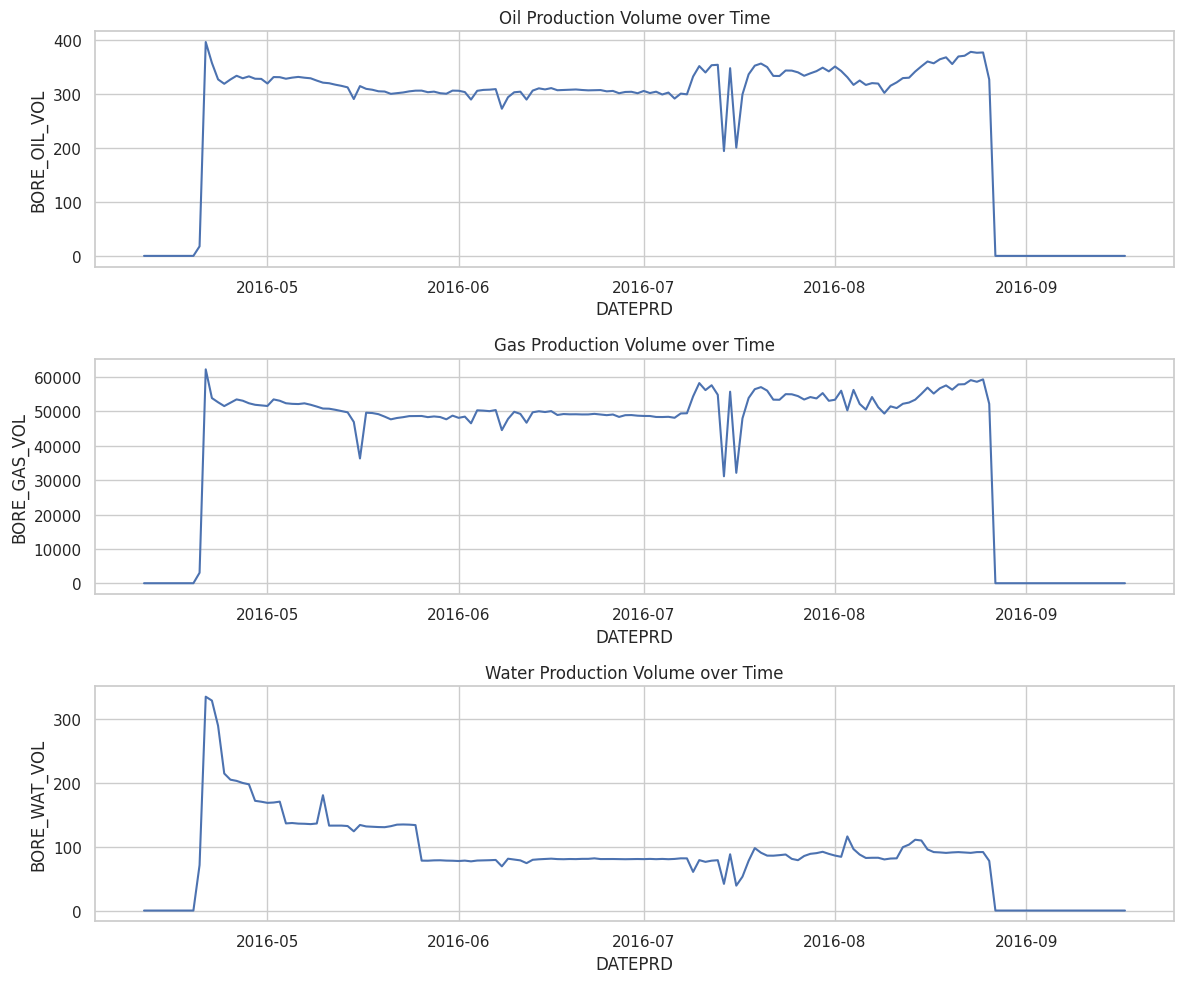

In [47]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize = (12, 10))

sns.lineplot(data=last_well_data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[0].set_title('Oil Production Volume over Time')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('BORE_OIL_VOL')
# axes[0].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

sns.lineplot(data=last_well_data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[1].set_title('Gas Production Volume over Time')
axes[1].set_xlabel('DATEPRD')
axes[1].set_ylabel('BORE_GAS_VOL')
# axes[1].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

sns.lineplot(data=last_well_data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[2].set_title('Water Production Volume over Time')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('BORE_WAT_VOL')
# axes[2].legend(title='NPD_WELL_BORE_NAME', loc='upper left', ncol=5)

plt.tight_layout()
plt.show()

In [48]:
# F5_data = last_well_data # keeping all data (including 0s at tail ends) and renaming for consistency

# last_well_data.head(30)
# last_well_data.tail(30)

F5_data = last_well_data[(last_well_data['DATEPRD'] > '2016-04-18') & (last_well_data['DATEPRD'] < '2016-08-28')] # removing tail ends due to 0s
F5_data

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
8,2016-04-19,15/9-F-5,0.00000,207.928007,82.358464,194.357797,10.396730,0.745271,11.736450,21.797570,0.000000,0.00,0.00,0.00
9,2016-04-20,15/9-F-5,5.84167,207.520074,82.340175,192.356508,14.578669,16.665578,12.231850,21.797570,1.505540,17.75,3048.80,71.05
10,2016-04-21,15/9-F-5,24.00000,156.108849,61.964591,144.387096,25.363551,80.414591,26.122884,54.168559,0.622656,396.80,62250.56,334.07
11,2016-04-22,15/9-F-5,24.00000,197.406380,77.361517,176.231753,28.703051,79.400186,26.003136,57.744172,0.559027,358.12,53895.45,327.99
12,2016-04-23,15/9-F-5,24.00000,194.822174,77.520316,171.977557,29.454258,79.459730,26.028061,57.133325,0.571334,327.46,52669.63,288.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2016-08-23,15/9-F-5,24.00000,149.332812,48.760886,145.249542,25.073654,100.000000,23.728094,56.861513,0.190029,378.55,59119.57,90.11
135,2016-08-24,15/9-F-5,24.00000,149.308124,48.762768,145.220458,24.933768,100.000000,23.703260,56.248741,0.167719,376.86,58632.31,91.32
136,2016-08-25,15/9-F-5,24.00000,149.284389,48.764552,145.203307,24.930640,100.000000,23.641755,57.883541,0.102264,377.44,59337.43,91.38
137,2016-08-26,15/9-F-5,20.59167,149.246452,48.766429,145.169658,24.828273,83.876813,23.970309,55.871967,0.420182,327.16,52209.60,77.52


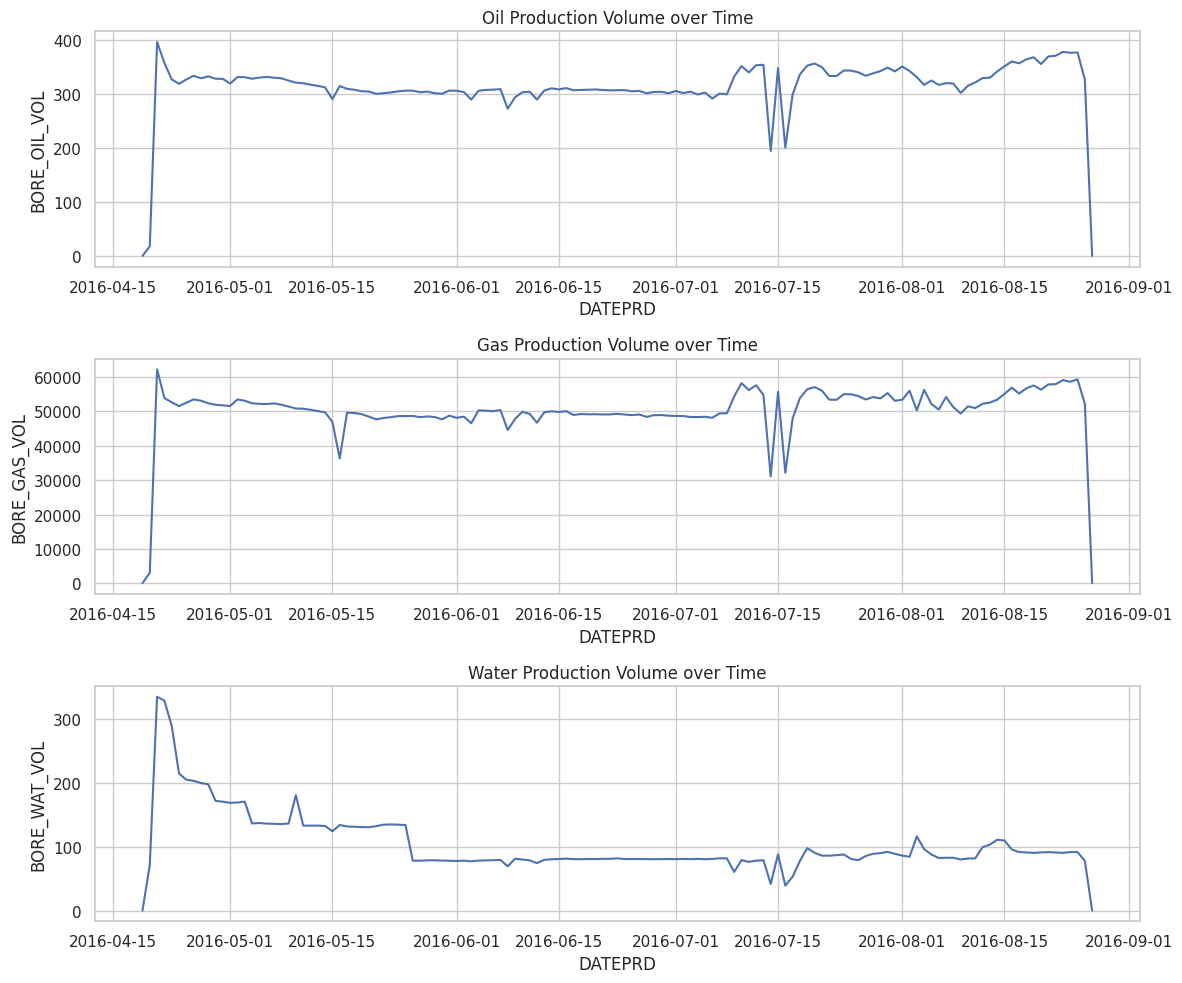

In [49]:
sns.set(style = "whitegrid")
fig, axes = plt.subplots(3, 1, figsize = (12, 10))

sns.lineplot(data=F5_data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[0].set_title('Oil Production Volume over Time')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('BORE_OIL_VOL')
# axes[0].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

sns.lineplot(data=F5_data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[1].set_title('Gas Production Volume over Time')
axes[1].set_xlabel('DATEPRD')
axes[1].set_ylabel('BORE_GAS_VOL')
# axes[1].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

sns.lineplot(data=F5_data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[2].set_title('Water Production Volume over Time')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('BORE_WAT_VOL')
# axes[2].legend(title='NPD_WELL_BORE_NAME', loc='upper left', ncol=5)

plt.tight_layout()
plt.show()

In [50]:
F5_data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
DATEPRD,131,2016-06-23 00:00:00,2016-04-19 00:00:00,2016-05-21 12:00:00,2016-06-23 00:00:00,2016-07-25 12:00:00,2016-08-27 00:00:00,NaN
ON_STREAM_HRS,131.0,22.697138,0.0,24.0,24.0,24.0,24.0,4.325459
AVG_DOWNHOLE_PRESSURE,131.0,183.669427,149.092983,179.040523,181.259282,191.598155,232.870985,22.986377
AVG_DOWNHOLE_TEMPERATURE,131.0,70.941609,48.725037,73.244394,77.693286,77.877366,82.358464,11.489249
AVG_DP_TUBING,131.0,173.215181,144.387096,165.927048,167.578161,173.526712,225.801894,21.860527
AVG_ANNULUS_PRESS,131.0,21.251062,10.39673,19.842749,20.539254,23.410586,29.454258,2.541322
AVG_CHOKE_SIZE_P,131.0,83.938887,0.745271,79.451793,80.276079,100.0,100.0,14.840248
AVG_WHP_P,131.0,24.345009,11.73645,23.684236,25.598881,25.734455,28.251582,2.482674
AVG_WHT_P,131.0,49.491704,21.79757,46.923282,49.204591,53.133157,58.343028,5.554563
DP_CHOKE_SIZE,131.0,0.388911,0.0,0.16608,0.23153,0.328681,7.62027,0.789739


In [51]:
F5_scaler = MinMaxScaler()

columns2 = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
columns_to_scale2 = F5_data[columns2].copy()
F5_scaled = F5_scaler.fit_transform(columns_to_scale2)
scaled_F5 = pd.DataFrame(F5_scaled, columns=columns2)

# scaled_F5.insert(0, 'DATEPRD', field_data['DATEPRD'])
# scaled_data.insert(1, 'NPD_WELL_BORE_NAME', data['NPD_WELL_BORE_NAME'])

scaled_F5

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,0.000000,0.702273,1.000000,0.613779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.243403,0.697404,0.999456,0.589198,0.219438,0.160398,0.029997,0.000000,0.197570,0.044733,0.048976,0.212680
2,1.000000,0.083744,0.393643,0.000000,0.785350,0.802675,0.871106,0.885773,0.081710,1.000000,1.000000,1.000000
3,1.000000,0.576684,0.851429,0.391141,0.960582,0.792455,0.863855,0.983613,0.073360,0.902520,0.865783,0.981800
4,1.000000,0.545838,0.856151,0.338888,1.000000,0.793055,0.865365,0.966899,0.074976,0.825252,0.846091,0.864100
...,...,...,...,...,...,...,...,...,...,...,...,...
126,1.000000,0.002863,0.001066,0.010593,0.770138,1.000000,0.726100,0.959461,0.024937,0.954007,0.949703,0.269734
127,1.000000,0.002568,0.001122,0.010236,0.762798,1.000000,0.724597,0.942694,0.022010,0.949748,0.941876,0.273356
128,1.000000,0.002285,0.001175,0.010025,0.762634,1.000000,0.720873,0.987427,0.013420,0.951210,0.953203,0.273535
129,0.857986,0.001832,0.001231,0.009612,0.757262,0.837557,0.740767,0.932384,0.055140,0.824496,0.838701,0.232047


In [52]:
X5 = scaled_F5[['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]
Y5 = scaled_F5[['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]

X5 = X5.values
Y5 = Y5.values

## Running Loaded Model + Visualization

In [53]:
F5 = windows(X5, Y5, window_size, batch_size) # creating dataset for F5
F5_set = tf.concat([x[0] for x in F5], axis=0) # converting dataset to tensor

In [54]:
# F5_set = windows(X5, Y5, window_size, batch_size)
# F5_predictions = model.predict(F5_set)

F5_predictions = model_deploy(F5_set, training = False)

In [55]:
F5_reverse_scaling = np.hstack([X5[window_size:, 3:], F5_predictions])
F5_unscaled_data = F5_scaler.inverse_transform(F5_reverse_scaling) # unscaling F5 predictions for plotting
F5_final_data = F5_data.iloc[-F5_predictions.shape[0]:].copy()

# adding unscaled F5 predictions as new columns at specified positions
F5_final_data.insert(11, 'PREDICTED_OIL', F5_unscaled_data[:, -3])
F5_final_data.insert(13, 'PREDICTED_GAS', F5_unscaled_data[:, -2])
F5_final_data.insert(15, 'PREDICTED_WATER', F5_unscaled_data[:, -1])

F5_final_data

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,PREDICTED_OIL,BORE_OIL_VOL,PREDICTED_GAS,BORE_GAS_VOL,PREDICTED_WATER,BORE_WAT_VOL
16,2016-04-27,15/9-F-5,24.00000,186.592268,77.714246,171.470829,19.345982,79.417800,25.817589,55.293113,0.307986,295.110767,329.53,44867.972598,53123.38,162.001504,199.28
17,2016-04-28,15/9-F-5,24.00000,186.092220,77.728142,171.073887,18.969732,79.516568,25.882272,52.107196,0.421883,294.837312,333.07,44845.969792,52382.59,163.340395,197.20
18,2016-04-29,15/9-F-5,24.00000,186.151332,77.725098,171.166430,18.469353,79.533727,25.848406,50.649594,0.388172,309.565813,328.68,47018.411044,51937.64,152.860624,171.42
19,2016-04-30,15/9-F-5,24.00000,186.743939,77.714896,171.745452,18.334317,79.462247,25.760933,51.360510,0.300967,311.220800,328.41,47259.859368,51748.70,149.640356,170.01
20,2016-05-01,15/9-F-5,24.00000,187.810415,77.693286,172.867195,18.045696,79.491836,25.989949,45.224000,0.532619,312.037024,319.83,47370.674847,51587.69,144.477272,168.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2016-08-23,15/9-F-5,24.00000,149.332812,48.760886,145.249542,25.073654,100.000000,23.728094,56.861513,0.190029,370.447493,378.55,56752.051480,59119.57,90.301730,90.11
135,2016-08-24,15/9-F-5,24.00000,149.308124,48.762768,145.220458,24.933768,100.000000,23.703260,56.248741,0.167719,371.641402,376.86,56967.170646,58632.31,87.090163,91.32
136,2016-08-25,15/9-F-5,24.00000,149.284389,48.764552,145.203307,24.930640,100.000000,23.641755,57.883541,0.102264,372.569283,377.44,57135.215682,59337.43,85.469396,91.38
137,2016-08-26,15/9-F-5,20.59167,149.246452,48.766429,145.169658,24.828273,83.876813,23.970309,55.871967,0.420182,369.964561,327.16,56659.261234,52209.60,84.958959,77.52


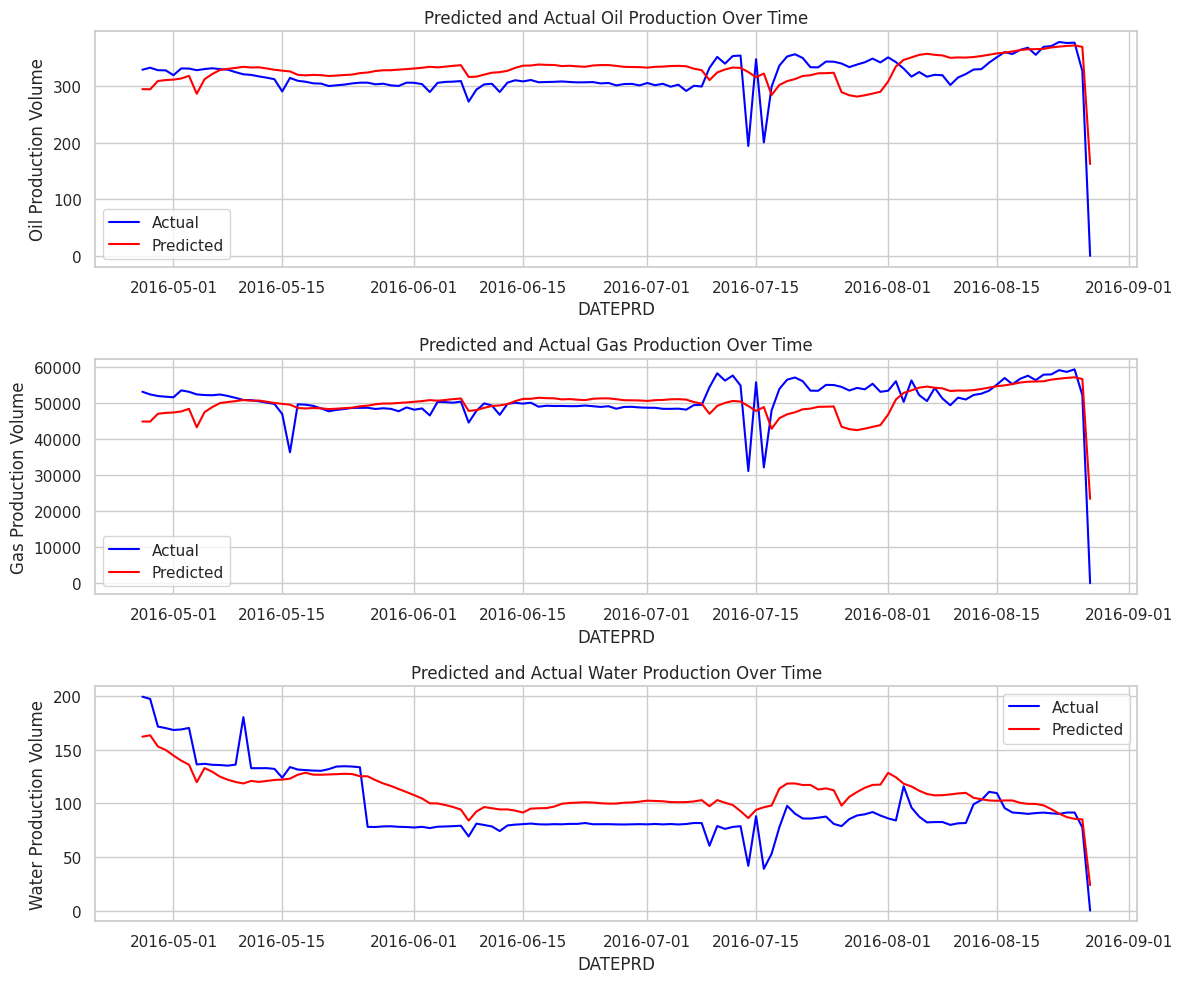

In [56]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(data=F5_final_data, x='DATEPRD', y='BORE_OIL_VOL', label='Actual', ax=axes[0], color='blue')
sns.lineplot(data=F5_final_data, x='DATEPRD', y='PREDICTED_OIL', label='Predicted', ax=axes[0], color='red')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('Oil Production Volume')
axes[0].set_title('Predicted and Actual Oil Production Over Time')
axes[0].legend()

sns.lineplot(data=F5_final_data, x='DATEPRD', y='BORE_GAS_VOL', label='Actual', ax=axes[1], color='blue')
sns.lineplot(data=F5_final_data, x='DATEPRD', y='PREDICTED_GAS', label='Predicted', ax=axes[1], color='red')
axes[0].set_xlabel('DATEPRD')
axes[1].set_ylabel('Gas Production Volume')
axes[1].set_title('Predicted and Actual Gas Production Over Time')
axes[1].legend()

sns.lineplot(data=F5_final_data, x='DATEPRD', y='BORE_WAT_VOL', label='Actual', ax=axes[2], color='blue')
sns.lineplot(data=F5_final_data, x='DATEPRD', y='PREDICTED_WATER', label='Predicted', ax=axes[2], color='red')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('Water Production Volume')
axes[2].set_title('Predicted and Actual Water Production Over Time')
axes[2].legend()

plt.tight_layout()
plt.show()

While the model captures the overall trends of oil, gas, and water production, there is a reduction in adaptability to unseen data. The forecast for oil and gas  production align with their actual production values during stable periods but tend to over- and under- estimate and lag behind sudden fluctuations. As for the water production forecast, the model initially underestimates and then overestimates water production from around mid-May 2016 onwards. These discrepancies could be due to insufficient temporal dependencies in the model and an over-reliance on historical trends – the well chosen for this exercise ran for the shortest period of time and has different trends and different magnitudes when compared to some of the other wells used for the model. Improvements to the model suggested earlier should address these issues, and are a focus for a future project.